Tutorial on how to perform a linear fit of data using the iminuit library

C:\Users\bruen\AppData\Local\Temp\ipykernel_33296\3258939277.py:31: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m.migrad() # finds minimum of least_squares function


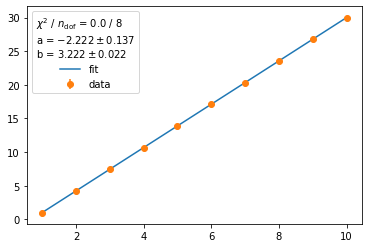

In [4]:
# You will need 5 libraries
from distutils.log import error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from iminuit import Minuit
from pylab import *
from pprint import pprint

# Lets make up some (almost) linear data to work with 
x_data = np.linspace(1,10,10)
y_data = np.linspace(1,30,10)
# Set a dummy error, this is usually calculated from the data set
error = .2

# Following good coding practices it is usually wise to define our functions first

# We first define our linear fit and our chi squared function

# Linear fit function
def model(x,a,b):
    return a + b*x 
# Chi squared function
def least_squares(a,b):
    return sum(((y_data - model(x_data,a,b))**2 / error**2))

# We can now call the "Minuit" module to perform our fit and grab our values
# Takes 3 arguments, initial slope and intercept (can be anything) and a function that
# determines how accurate our fit is
m = Minuit(least_squares,a=0,b=0)
m.migrad() # finds minimum of least_squares function
m.hesse() # computes errors

plt.plot(x_data, model(x_data, *m.values), label="fit")
# Our fit is now complete, the rest of this script is dedicated to printing out the parameter values
# in a sleek format using the pprint library

# This line marks and labels our data points and displays error bars
plt.errorbar(x_data,y_data,yerr=error, fmt="o", label="data")

# Next lines are filled with fancy string formatting, returns a nice box located in the top left of your graph
# with parameter values and reduced chi squared value in it
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(x_data) - m.nfit}",]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info));

